# Introduction 

In simple linear regression we are given set of variables 

$$ X, y = {(x_1, y_1), (x_2, y_2), ... ... ... (x_N, y_N)} $$

Our task is to predict the values of y given set of values X for some unknown x's. For this we fit the model where both X and y are given and use it to predict known X and unknown y. 

# Importing packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Importing data in pandas 

In [2]:
df = pd.read_csv('ex1data1.txt', header = None, names = ['populations', 'profit'])

In [3]:
df.head()

,populations,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df.tail()

,populations,profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


# Plotting the data 

Two dimensional plot of X vs y is called the scatter plot. It gives the visualization representation of the relation between variables. It is possible to make this type of plot in case of linear regression where there are two variables and they accomodate in 2D plane. But the same is not true in multiple linear regression where p-features + y need p+1 dimensional space to make such a plot. 

In [5]:
X = df[['populations']]
y = df['profit']
m = len(y)

In [6]:
print(np.shape(X))
print(np.shape(y))

(97, 1)
(97,)


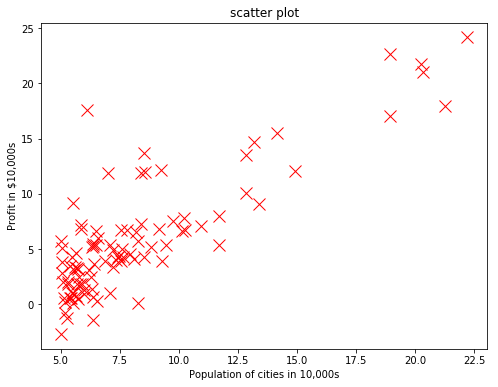

In [7]:
plt.figure(figsize = (8, 6))
plt.plot(df['populations'], df['profit'], 'rx', markersize = 12)
plt.xlabel('Population of cities in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('scatter plot')
plt.show()

# Cost function 

The line of best fit for y given X takes the following form: 

$$ y = \theta_0 + \theta_1 X $$

Where, for unknown y, it is usually called a hypothesis. 

$$ y_{pred} = h (X, \theta) $$

For the training set the difference of the prediction by the hypothesis h and y is called the residue error. The sum of square of residue of each data point in training set is called cost function. Which loos like this: 

$$ J(X, y, \theta) = \frac{1}{2m} \sum_{i = 1}^m \left(h(X^{(i)}, \theta) - y^{(i)}\right)^2  $$

In [8]:
theta = np.zeros(2)
theta

array([0., 0.])

In [9]:
X.insert(0, 'Bias', 1)

X.head()

,Bias,populations
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [10]:
def hypothesis(theta, X):
    return np.dot(X, theta)

In [11]:
hypothesis(theta, X)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
def cost_function(theta, X, y):
    return 1/(2 * m) * np.sum((hypothesis(theta, X) - y) ** 2)

In [13]:
cost_function(theta, X, y)

32.072733877455676

# Solving by normal equation

Our aim is to choose such a pair of $\theta$'s in hypothesis, such that cost function $J(X, y, \theta)$ is minimized. In calculus minimum is given by following conditions: 

$$ \frac{\partial J}{\partial \theta} = 0  \quad and \quad \frac{\partial^2 J}{\partial \theta^2} > 0   $$

This condition when applied to the cost function gives us the normal equations for the linear regression. 

$$ \theta = (X^T X)^{-1} (X^Ty) $$

In [14]:
X_mat = X.values
X_T = X_mat.transpose()

XT_X_inv = np.linalg.inv(np.matmul(X_T, X_mat))
XT_y = np.matmul(X_T, y)

np.matmul(XT_X_inv, XT_y)

array([-3.89578088,  1.19303364])

These are the values of $\theta_0$ and $\theta_1$. 


# Gradient descent

Although the use of normal equation gives the perfect solution it has certain limitations. First, they are slow for large data set. They might not necessarily exist for the algorithm other than linear regression. So, here comes the gradient descent. 

In calculus, gradient is the direction of the maximum increase of a function. So, negative of the gradient is direction of maximum decrease of the function. By gradient we mean the following two functions: 

$$ \frac{\partial J}{\partial \theta_0} \quad and \quad \frac{\partial J}{\partial \theta_1}   $$


Hence the following recursion give eventually leads to the local minima (for well defined cost function there is only global minima):

$$ \theta_0 = \theta_0 - \alpha \frac{\partial J}{\partial \theta_0} $$
.

$$ \theta_1 = \theta_1 - \alpha \frac{\partial J}{\partial \theta_1} $$


If we substitute the expression of the cost function in the above relations we arrive at the following pair of expressions. 

$$ \theta_0 = \theta_0 - \frac{\alpha}{m} \sum_{i = 1}^m \left(h(X^{(i)}, \theta) - y^{(i)}\right) $$
.

$$ \theta_1 = \theta_1 - \frac{\alpha}{m} \sum_{i = 1}^m \left(h(X^{(i)}, \theta) - y^{(i)}\right) X^{i} $$

In [15]:
iterations = 2000
alpha = 0.01

In [16]:
def gradient(theta, X, y):
    return 1/m * np.dot(hypothesis(theta, X) - y, X)

In [17]:
gradient(theta, X, y)

array([ -5.83913505, -65.32884975])

In [18]:
def gradient_descent(theta, X, y, alpha, iterations):
    
    cost_list = list()
    
    for _ in range(iterations):
        theta = theta - alpha * gradient(theta, X, y)
        cost_list.append(cost_function(theta, X, y))
    return theta, cost_list

In [19]:
result = gradient_descent(theta, X, y, alpha, iterations)
result[0]

array([-3.78806857,  1.18221277])

These are exactly same as the values of $\theta_0$ and $\theta_1$ as we calculated above by using normal equations. 

# Line of best fit 

In [20]:
result[0][0]

-3.788068572723111

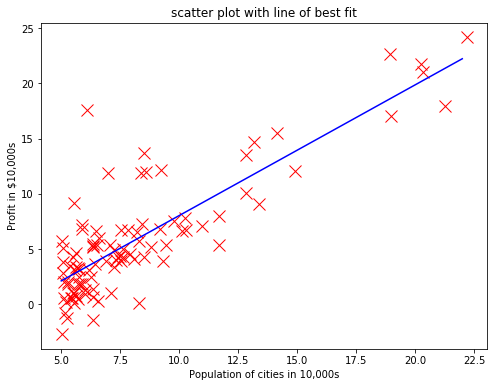

In [21]:
X_list = [5, 22]
plt.figure(figsize = (8, 6))
plt.plot(df['populations'], df['profit'], 'rx', markersize = 12)
plt.plot(X_list, np.dot(result[0][1], X_list) + result[0][0], 'b')
plt.xlabel('Population of cities in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('scatter plot with line of best fit')
plt.show()

# Convergence of cost function

In this section we evaluate the value of the cost function at the predicted values of the $\theta$'s. In the following plot it is seen that the cost function is gradually decreasing in each iterations and finally approaches the minimum asymptotically.

In [22]:
cost_function(result[0], X, y)

4.4780276098799705

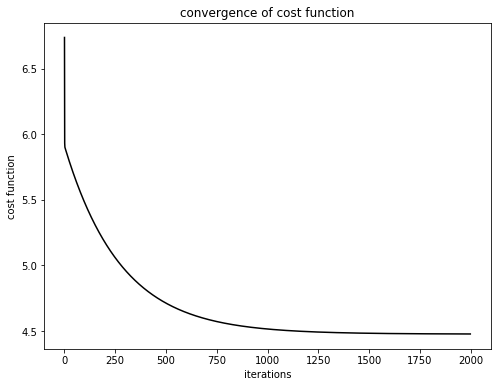

In [23]:
plt.figure(figsize = (8, 6))
plt.plot(result[1], 'k')
plt.xlabel('iterations')
plt.ylabel('cost function')
plt.title('convergence of cost function')
plt.show()

# 3D plot and contour plot

In the following 3D plot and contour plot we can see that $\theta_0 = -3.8 \quad and \quad \theta_1 = 1.2 $ is indded the location of minimum of the surface of the cost function.

In [24]:
from mpl_toolkits.mplot3d import Axes3D

In [25]:
theta_0 = np.linspace(-10, 10)
theta_1 = np.linspace(-1, 4)
theta_0x, theta_1x = np.meshgrid(theta_0, theta_1, indexing = 'xy')

cost_grid = np.zeros((theta_0.size,theta_1.size))

for (i, j), k in np.ndenumerate(cost_grid):
    theta_ij = [theta_0[j], theta_1[i]]
    cost_grid[i,j] = cost_function(theta_ij, X, y)

In [26]:
[theta_0[1], theta_1[1]]

[-9.591836734693878, -0.8979591836734694]

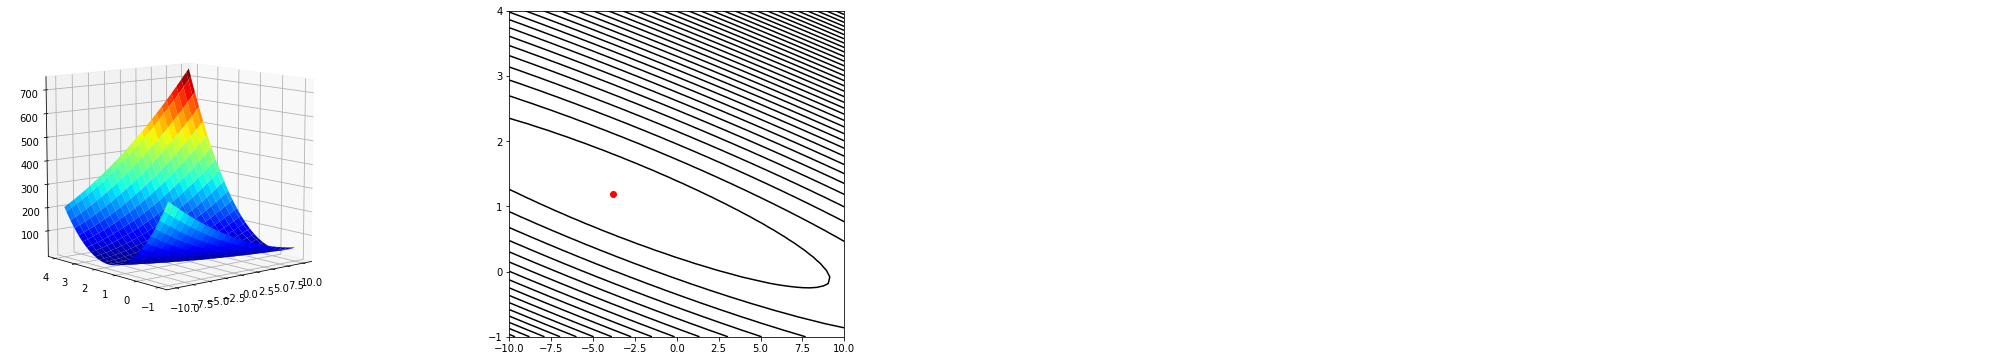

In [27]:
fig = plt.figure(figsize = (15, 6))

ax = fig.add_subplot(121, projection = '3d')
ax.plot_surface(theta_0x, theta_1x, cost_grid, rstride = 2, cstride = 2, cmap = plt.cm.jet)
ax.view_init(elev = 10, azim = 230)

ax = fig.add_subplot(122)
ax.contour(theta_0x,theta_1x, cost_grid, 40, colors = 'k')
ax.scatter(result[0][0], result[0][1], color = 'r')

fig.subplots_adjust(wspace = 0.5)
plt.show()

# Linear fit using scikit learn 

The algorithm written above might be slow to implement on large data set on real life. In that case we can use advanced optimization method using scikit learn or statsmodel. This and next sections are about scikit learn. And last section is about the statsmodel package.

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
X = df[['populations']]
y = df['profit']

model.fit(X, y)
xfit = np.linspace(5, 22, 5)
yfit = model.predict(xfit[:, np.newaxis])

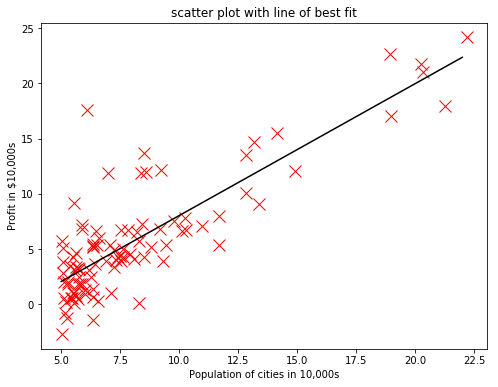

In [31]:
plt.figure(figsize = (8, 6))
plt.plot(X, y, 'rx', markersize = 12)
plt.plot(xfit, yfit, 'k');
plt.xlabel('Population of cities in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('scatter plot with line of best fit')
plt.show()

# Accessing model accuracy 

Mean squared error and R-squared calculated here gives some indication about how well the data is fitting on the training set. It might not necessarily indicate its accuracy in test set. If the model fits exceptionally well on training set and performs worst on test set, then there might be overfitting. We we should avoide in any cost. 

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [33]:
y_pred = model.predict(X)

print('Mean squared error : \t', mean_squared_error(y, y_pred))
print('R squared : \t \t', r2_score(y, y_pred))

Mean squared error : 	 8.953942751950358
R squared : 	 	 0.7020315537841397


# Linear model using statsmodels

Statsmodes' functionality can be useful for staistical modeling. More importantly it gives the standard error and p-value of each regression coefficient. Which can be very helpful in feature selection etc. 

Also notice that the coef: (intercept, population) are very close to $\theta_0 \quad and \quad \theta_1 $ predicted above. Also R-squared is the same, indicating the consistencies of our overall calculation.

In [34]:
import statsmodels.formula.api as smf 

In [35]:
results = smf.ols('profit ~ populations', data = df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     223.8
Date:                Mon, 05 Nov 2018   Prob (F-statistic):           1.02e-26
Time:                        23:09:22   Log-Likelihood:                -243.95
No. Observations:                  97   AIC:                             491.9
Df Residuals:                      95   BIC:                             497.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.8958      0.719     -5.415      0.000      -5.324      -2.467
populations     1.1930      0.080     14.961      0.000       1.035       1.351
==============================================================================
Omnibus:                       39.986   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.142
Skew:                           1.455   Prob(JB):                     3.29e-24
Kurtosis:                       7.276   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""